# Street View House Numbers: Number Recognition

Hello, and welcome to my notebook! In this project, I will be working with the Street View House Numbers dataset from Stanford University. My primary goal is to develop a model that can accurately recognize and classify numbers from 0 to 9.

## Problem Statement
The problem I am addressing in this project is to build a robust number recognition system. Street View House Numbers (SVHN) dataset contains a large collection of images of house numbers captured from Google Street View. Recognizing numbers from natural images is a fundamental problem with applications in various fields, including optical character recognition (OCR), address parsing, and more. Therefore, developing an accurate and efficient number recognition model is of significant importance.

## Dataset Description
The Street View House Numbers dataset is a rich source of real-world images containing house numbers. It includes tens of thousands of images, each depicting a house number from the streets. The dataset is labeled with the corresponding digits for each image. The images vary in terms of size, orientation, lighting conditions, and more, making it a challenging dataset for number recognition.

## Objective
The primary goal of this project is to develop a model for accurate number recognition. This model will take an image containing a number and correctly identify the number. To achieve this, I will perform essential tasks, including data preprocessing, model development, and evaluation.

## Data Preprocessing
Before training a model, I will preprocess the dataset. This includes tasks such as resizing, normalization, and data augmentation.

## Structure of the Notebook
To achieve the objectives mentioned above, this notebook is structured as follows:

1. Data Exploration: In this section, I will explore the dataset, visualizing the images and their labels. This step will help in gaining insights into the data.

2. Data Preprocessing: Here, I will perform various data preprocessing steps, including resizing, normalization, and data augmentation.

3. Model Building: This section will focus on developing a model for number recognition. I will experiment with different model architectures and hyperparameters.

4. Model Evaluation: I will evaluate the model's performance using appropriate metrics and visualization techniques.

5. Conclusion: The final section will summarize the project's findings and provide insights for future improvements.

Let's get started with exploring the data and building the number recognition model!



## Importing Libraries and Modules

In this section, I am importing various Python libraries and TensorFlow modules that I will be using in the subsequent code. These libraries include data manipulation libraries like pandas and numpy, as well as machine learning and computer vision libraries such as TensorFlow, scikit-learn, and OpenCV. I'm also importing modules for data visualization.

Additionally, I'm importing specific components from the TensorFlow library, such as layers, optimizers, loss functions, and callbacks. These will be crucial for building and training my number recognition model. import various Python libraries and TensorFlow modules that will be used in the subsequent code. These libraries include data manipulation libraries like pandas and numpy, as well as machine learning and computer vision libraries such as TensorFlow, scikit-learn, and OpenCV. We also import modules for data visualization.

Additionally, we import specific components from the TensorFlow library, such as layers, optimizers, loss functions, and callbacks. These will be crucial for building and training our number recognition model.

Let's proceed with importing the necessary tools for our project.


In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import os
from tensorflow.keras.metrics import TopKCategoricalAccuracy, CategoricalAccuracy
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, 
                                     Dropout, RandomRotation,RandomZoom , RandomWidth , RandomHeight , RandomBrightness,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam , SGD 
from tensorflow.keras.callbacks import  ReduceLROnPlateau 
from tensorflow.keras.regularizers  import L2



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


I've defined file paths for the training and testing datasets, including both the structure file paths and the image file paths, to prepare for loading and processing the Street View House Numbers dataset.

In [2]:
train_mat_path = '/kaggle/input/street-view-house-numbers/train_digitStruct.mat'
test_mat_path = '/kaggle/input/street-view-house-numbers/test_digitStruct.mat'
train_img_path = "/kaggle/input/street-view-house-numbers/train/train"
test_img_path = "/kaggle/input/street-view-house-numbers/test/test"

In [3]:
!pip install mat73

using the mat73 library to load data from MAT files.

In [4]:
import mat73
train_dict = mat73.loadmat(train_mat_path)
test_dict = mat73.loadmat(test_mat_path)
train_bbox_data = train_dict['digitStruct']['bbox']
test_bbox_data = test_dict['digitStruct']['bbox']

## Converting Bounding Box Data to DataFrames

In the code, I've defined a custom function `to_DataFrame` that takes a list of data and extracts specific attributes from it to create a DataFrame. I used this function to convert both the training and testing bounding box data into DataFrames for easier data manipulation and analysis in my project.

In [5]:
def to_DataFrame(data):
    height = []
    label = []
    left = []
    top = []
    width = []

    for item in data:
        height.append(item['height'])
        label.append(item['label'])
        left.append(item['left'])
        top.append(item['top'])
        width.append(item['width'])

    Dataframe = pd.DataFrame({'height': height, 'label': label, 'left': left, 'top': top, 'width': width})
    
    return Dataframe


train_df = to_DataFrame(train_bbox_data)
test_df = to_DataFrame(test_bbox_data)

In the following code, I've applied a custom function `convert_to_list` to each column in both the training and testing DataFrames. This function ensures that every value within a column is represented as a list, which can be helpful for consistency in data handling and further processing in my project.

In [6]:
def convert_to_list(value):
    if not isinstance(value, list):
        return [value]
    return value

# Iterate through each column and apply the conversion function
for column in train_df.columns:
    train_df[column] = train_df[column].apply(convert_to_list)
for column in test_df.columns:
    test_df[column] = test_df[column].apply(convert_to_list)



In [7]:
len_train = len(os.listdir(train_img_path))
len_test = len(os.listdir(test_img_path))

train_img_name=[i for i in range(1,len_train)]
test_img_name=[i for i in range(1,len_test-1)]

Created file paths for training and testing images using image names from the dataset.

In [8]:
train_img_path = ["/kaggle/input/street-view-house-numbers/train/train/" + str(i) + ".png" for i in train_img_name]
test_img_path = ["/kaggle/input/street-view-house-numbers/test/test/" + str(i) +".png" for i in test_img_name]
train_img_path[:1]

['/kaggle/input/street-view-house-numbers/train/train/1.png']

In [9]:
train_df["file_path"] = train_img_path
test_df["file_path"] = test_img_path

In [10]:
train_df.head()

,height,label,left,top,width,file_path
0,"[219.0, 219.0]","[1.0, 9.0]","[246.0, 323.0]","[77.0, 81.0]","[81.0, 96.0]",/kaggle/input/street-view-house-numbers/train/...
1,"[32.0, 32.0]","[2.0, 3.0]","[77.0, 98.0]","[29.0, 25.0]","[23.0, 26.0]",/kaggle/input/street-view-house-numbers/train/...
2,"[15.0, 15.0]","[2.0, 5.0]","[17.0, 25.0]","[5.0, 5.0]","[8.0, 9.0]",/kaggle/input/street-view-house-numbers/train/...
3,"[34.0, 34.0]","[9.0, 3.0]","[57.0, 72.0]","[13.0, 13.0]","[15.0, 13.0]",/kaggle/input/street-view-house-numbers/train/...
4,"[46.0, 46.0]","[3.0, 1.0]","[52.0, 74.0]","[7.0, 10.0]","[21.0, 15.0]",/kaggle/input/street-view-house-numbers/train/...


In [11]:
test_df.head()

,height,label,left,top,width,file_path
0,[30.0],[5.0],[43.0],[7.0],[19.0],/kaggle/input/street-view-house-numbers/test/t...
1,"[23.0, 23.0, 23.0]","[2.0, 1.0, 10.0]","[99.0, 114.0, 121.0]","[5.0, 8.0, 6.0]","[14.0, 8.0, 12.0]",/kaggle/input/street-view-house-numbers/test/t...
2,[16.0],[6.0],[61.0],[6.0],[11.0],/kaggle/input/street-view-house-numbers/test/t...
3,[17.0],[1.0],[32.0],[6.0],[14.0],/kaggle/input/street-view-house-numbers/test/t...
4,[28.0],[9.0],[97.0],[28.0],[19.0],/kaggle/input/street-view-house-numbers/test/t...


I've preprocessed the images and labels from the training dataset, converting them into a suitable format for training my number recognition model. The preprocessed images have been resized, converted to grayscale, and stored in the `preprocessed_images` list, while the corresponding labels have been one-hot encoded and stored in the `labels` variable. I've also included a visualization to show the original image and two preprocessed samples.

[array(2.), array(8.)]


(-0.5, 27.5, 27.5, -0.5)

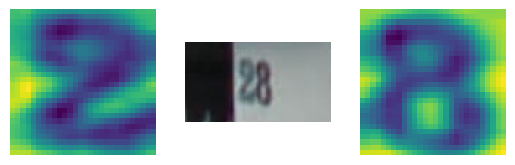

In [12]:
import math
row = train_df.iloc[6]
img  = cv2.imread(row["file_path"])
top_list =row['top']
left_list = row['left']
height_list = row['height']
width_list = row['width']
label_list = row['label'] 
preprocessed_images = []
labels = []
for i in range(len(top_list)):
        top = abs(top_list[i])
        left = abs(left_list[i])
        height = height_list[i]
        width = width_list[i]
        if label_list[i]%10==0:
            label = 0
        else:
            label = label_list[i]
            
        object_roi = img[int(top):int(top + height), int(left):int(left + width)]
        resized_object = cv2.resize(object_roi, (28, 28))
        grayscale_object = cv2.cvtColor(resized_object, cv2.COLOR_BGR2GRAY)

        preprocessed_images.append(grayscale_object)
        labels.append(label)
lables = tf.keras.utils.to_categorical(labels)

print(labels)
plt.subplot(1 , 3,1)
plt.imshow(preprocessed_images[0])
plt.axis("off")
plt.subplot(1 , 3,2)
plt.imshow(img)
plt.axis("off")
plt.subplot(1 , 3,3)
plt.imshow(preprocessed_images[1])
plt.axis("off")

In this code, I've defined a function, `preprocess_and_extract_roi`, which takes a row of data from the dataset and preprocesses the corresponding image regions of interest (ROIs) and labels. The function resizes the ROIs to 32x32 pixels, one-hot encodes the labels, and returns the preprocessed images and labels. This function allows for efficient preprocessing of multiple ROIs in a given row, ensuring that the data is ready for model training.

**Region of interest (ROI) from an image**
* `int(top)` and `int(top + height)` determine the vertical boundaries of the ROI. They represent the top and bottom coordinates of the ROI.
* `int(left)` and `int(left + width)` determine the horizontal boundaries of the ROI. They represent the left and right coordinates of the ROI.

`top` represents the top coordinate of the region you want to extract.

`left` represents the left coordinate of the region.

`height` represents the height of the region.

`width` represents the width of the region.

* The line object_roi = ***image[int(top):int(top + height), int(left):int(left + width)]*** extracts the region of interest, resulting in a new image or sub-image 

In [13]:

def preprocess_and_extract_roi(row):
    image = cv2.imread(row['file_path'])
    if image is None:
        return None, None

    top_list = row['top']
    left_list = row['left']
    height_list = row['height']
    width_list = row['width']
    label_list = row['label']

    preprocessed_images = []
    labels = []

    for i in range(len(top_list)):
        top = abs(top_list[i])
        left = abs(left_list[i])
        height = abs(height_list[i])
        width = abs(width_list[i])
        if label_list[i]%10==0:
            label = 0
        else:
            label = label_list[i]
        
        

        object_roi = image[int(top):int(top + height), int(left):int(left + width)]
        resized_object = cv2.resize(object_roi, (32, 32))

        preprocessed_images.append(resized_object)
        labels.append(label)

    return preprocessed_images, tf.keras.utils.to_categorical(labels)


In [14]:
def preprocess_and_extract_roi_batch(dataframe):
    preprocessed_images = []
    labels = []

    for index, row in dataframe.iterrows():
        images, lbls = preprocess_and_extract_roi(row)
        if images is not None and lbls is not None:
            preprocessed_images.extend(images)
            labels.extend(lbls)

    return preprocessed_images, labels


train_preprocessed_images, train_labels = preprocess_and_extract_roi_batch(train_df)
train_preprocessed_images = np.array(train_preprocessed_images)
train_labels = np.array(train_labels , dtype="object")

test_preprocessed_images, test_labels = preprocess_and_extract_roi_batch(test_df)
test_preprocessed_images = np.array(test_preprocessed_images)
test_labels = np.array(test_labels , dtype="object")

print(train_preprocessed_images.shape,test_preprocessed_images.shape)  
print(train_labels.shape , test_labels.shape)  

(73257, 32, 32, 3) (26032, 32, 32, 3)
(73257,) (26032,)


**Visualizing images with their corresponging labels**

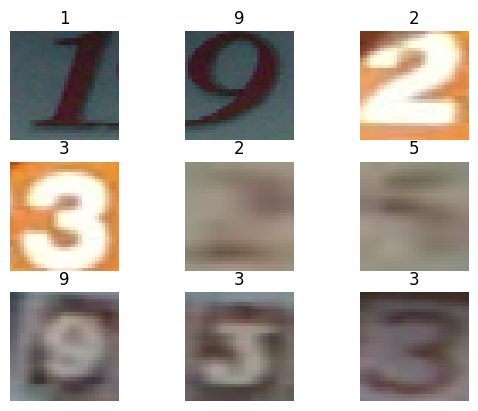

In [15]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_preprocessed_images[i])
    plt.axis("off")
    plt.title(np.argmax(train_labels[i]))

I've implemented a function called `pad_labels` that takes a list of labels and ensures that each label sequence is of the same length by padding with zeros if needed. This is important for sequence-based tasks where inputs must have consistent dimensions, and this function helps ensure the labels are appropriately formatted for the model's requirements.

In [16]:
def pad_labels(labels, max_length):
    for i in range(len(labels)):
        label = labels[i]
        if len(label) < max_length:
            padding_length = max_length - len(label)
            labels[i] = np.concatenate((label, np.zeros(padding_length)))
    return labels

In [17]:
train_labels = pad_labels(train_labels , 10)
test_labels = pad_labels(test_labels , 10)

**I've converted the training and testing labels into TensorFlow tensors with a data type of tf.float32, as well as the preprocessed images, to ensure compatibility with TensorFlow operations.**

In [18]:
train_labels = [tf.convert_to_tensor(label , dtype = tf.float32) for label in train_labels]
test_labels = [tf.convert_to_tensor(label , dtype = tf.float32) for label in test_labels]

train_images = tf.convert_to_tensor(train_preprocessed_images, dtype=tf.float32)
test_images = tf.convert_to_tensor(test_preprocessed_images, dtype=tf.float32)

**I've converted the labels and images to their corresponding dataset**

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [20]:
print(len(train_dataset) , len(test_dataset))

73257 26032


In [21]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO):
    DATASET_SIZE = len(dataset)

    train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

    val_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
    val_dataset = val_dataset.take(int(VAL_RATIO*DATASET_SIZE))

    return train_dataset, val_dataset

splitted `train_dataset` into train and val dataset

In [22]:
TRAIN_RATIO = 0.9
VAL_RATIO = 0.1

train_dataset, val_dataset = splits(train_dataset, TRAIN_RATIO, VAL_RATIO)

## Data augmentation

In [23]:
agumenter_layer = tf.keras.Sequential([
    RandomRotation(factor=(-0.03, 0.03)),
    RandomZoom(height_factor=(0.2, 0.2), width_factor=(0.2, 0.2)),
])
def process_data(image , labels):
    return agumenter_layer(image , training = True) , labels


In [24]:
batch_size = 32
train_dataset = (train_dataset.batch(batch_size)
                 .shuffle(buffer_size = 1024, reshuffle_each_iteration = True)
                 .map(process_data)
                 .prefetch(tf.data.AUTOTUNE))
val_dataset = val_dataset.shuffle(buffer_size = 1024, reshuffle_each_iteration = True).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).shuffle(buffer_size = 1024, reshuffle_each_iteration = True).prefetch(tf.data.AUTOTUNE)

In [25]:
print(len(train_dataset) , len(val_dataset) , len(test_dataset))

2061 229 814


Images of train_dataset train dataset with their corresponding labels

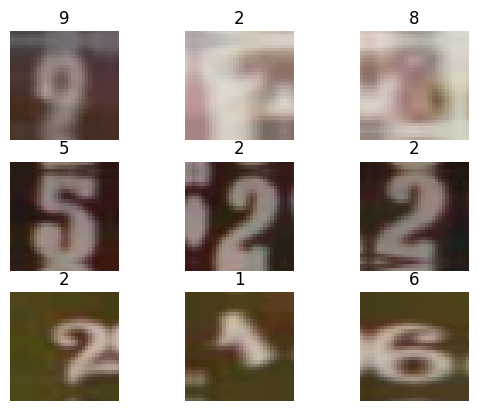

In [26]:
for image , labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i]/255.)
        plt.title(tf.argmax(labels[i]).numpy())
        plt.axis("off")

## Modeling

I've defined a convolutional neural network (CNN) model using TensorFlow and Keras . This model consists of convolutional layers, batch normalization, max-pooling, dropout for regularization, and fully connected layers. I've also used the ReLU activation function for most layers to introduce non-linearity in the model. The last layer is a softmax activation, which is suitable for multi-class classification problems. 

In [27]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (32, 32, 3)),

    Conv2D(filters = 32 , kernel_size = 5, kernel_initializer="he_uniform" , padding='same',
          activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides=2),

    Conv2D(filters = 64 , kernel_size = (3,3), kernel_initializer="he_uniform" , padding='same',activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides=2),

    Conv2D(filters = 128 , kernel_size = (3,3), kernel_initializer="he_uniform" , padding='same',activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides=2),
    Dropout(rate = 0.2 ),
    
    
    Conv2D(filters =  256, kernel_size = (3,3), kernel_initializer="he_uniform" , padding='same',activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides=2),
    Dropout(rate = 0.2 ),

    Flatten(),
    
    
    Dense( 200, activation = "relu",   kernel_initializer="he_uniform"),
    BatchNormalization(),
    Dropout(rate = 0.1),
    
    Dense( 100, activation = "relu", kernel_initializer="he_uniform"),
    BatchNormalization(),

    Dense(10, activation = "softmax"),

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                      

### Callbacks
ReduceLROnPlateau callback from TensorFlow's Keras library. This callback is designed to dynamically adjust the learning rate during training based on the validation loss.

In [28]:
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1024,
    patience=3,
    verbose=0,)

### Metrics
 Defined a list of evaluation metrics for model performance. Two metrics are included: `CategoricalAccuracy` and `TopKCategoricalAccuracy` with `k=2`.

In [29]:
metrics = [CategoricalAccuracy(name = "accuracy"), TopKCategoricalAccuracy(k=2, name = "top_k_accuracy")]

 I have compiled the neural network model using the `Adam` optimizer with a learning rate of 0.001. The `categorical_crossentropy` loss function is chosen for a multi-class classification problem, and the metric used for evaluation is `accuracy`.

In [30]:
model.compile(optimizer=Adam(learning_rate = 0.001),
              loss='categorical_crossentropy',  
              metrics=metrics)

I have trained the model using the fit method with data from train_dataset for 30 epochs and validation data from val_dataset, while also used the `reduce_lr_callback` to adjust the learning rate during training based on validation loss.

In [31]:
history = model.fit(train_dataset,
          epochs=30,
          validation_data=val_dataset,
         callbacks=[reduce_lr_callback])

Epoch 1/30


2023-11-04 06:11:11.233929: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2061/2061 [==============================] - 40s 10ms/step - loss: 0.8088 - accuracy: 0.7387 - top_k_accuracy: 0.8422 - val_loss: 0.6022 - val_accuracy: 0.8083 - val_top_k_accuracy: 0.9048 - lr: 0.0010
Epoch 2/30
2061/2061 [==============================] - 20s 10ms/step - loss: 0.4264 - accuracy: 0.8692 - top_k_accuracy: 0.9385 - val_loss: 0.4366 - val_accuracy: 0.8624 - val_top_k_accuracy: 0.9365 - lr: 0.0010
Epoch 3/30
2061/2061 [==============================] - 20s 10ms/step - loss: 0.3666 - accuracy: 0.8872 - top_k_accuracy: 0.9496 - val_loss: 0.4075 - val_accuracy: 0.8741 - val_top_k_accuracy: 0.9454 - lr: 0.0010
Epoch 4/30
2061/2061 [==============================] - 19s 9ms/step - loss: 0.3207 - accuracy: 0.9035 - top_k_accuracy: 0.9558 - val_loss: 0.3419 - val_accuracy: 0.8971 - val_top_k_accuracy: 0.9548 - lr: 0.0010
Epoch 5/30
2061/2061 [==============================] - 20s 10ms/step - loss: 0.2945 - accuracy: 0.9112 - top_k_accuracy: 0.9611 - val_loss: 0.3852 - val_accura

## Model Training and Evaluation

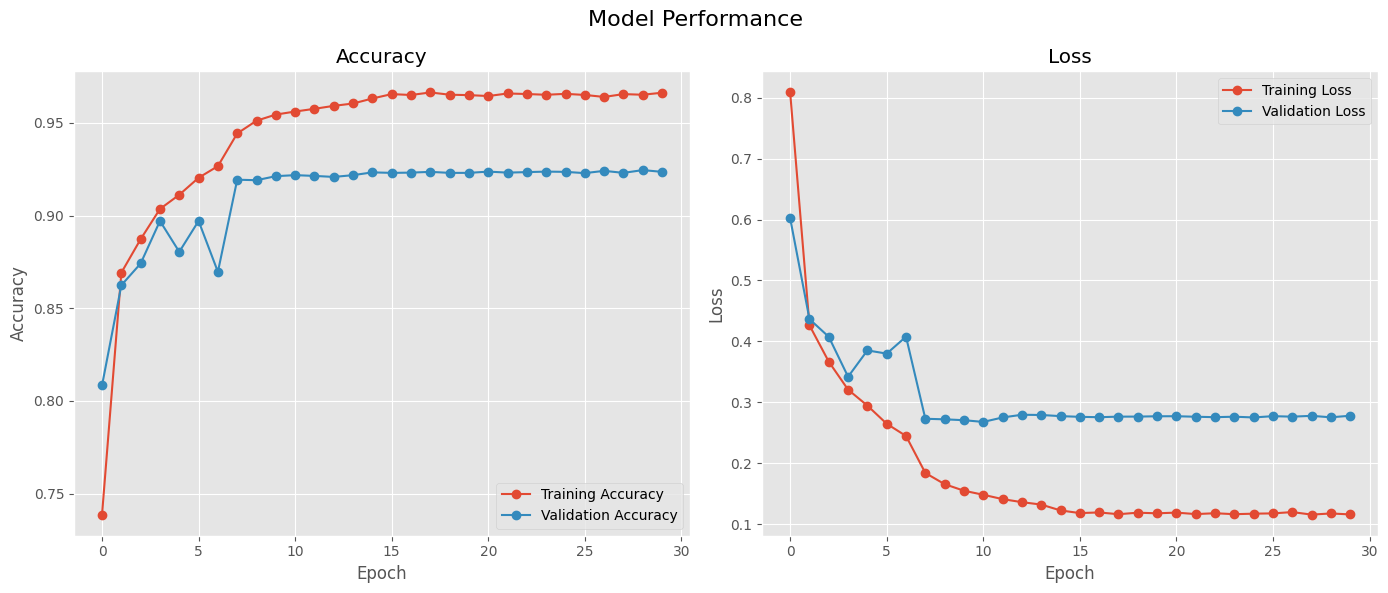

In [32]:
plt.style.use("ggplot")
plt.figure(figsize=(14, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label='Training Accuracy', marker='o', linestyle='-')
plt.plot(history.history["val_accuracy"], label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', linestyle='-')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("Model Performance" ,fontsize=16)
plt.tight_layout()
plt.show()


In [33]:
model.evaluate(test_dataset)

814/814 [==============================] - 3s 4ms/step - loss: 0.2252 - accuracy: 0.9384 - top_k_accuracy: 0.9751


[0.22518955171108246, 0.9384219646453857, 0.9751459956169128]

### Testing the Model on a Single Image

In [34]:
def test_model(img_path):
    image = cv2.imread(img_path)
    img = cv2.resize(image , (32,32))
    img = np.expand_dims(img ,axis =0)
    plt.imshow(image)
    plt.axis("off")
    plt.title(np.argmax(model.predict(img)))

1/1 [==============================] - 0s 403ms/step


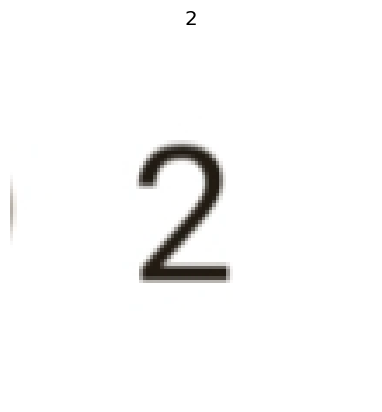

In [35]:
test_model("/kaggle/input/2vsvhds/2.jpg")

In [36]:
model.save("/kaggle/working/model.hdf5")

## Conclusion
In this notebook, I have build a number recognition model using the Street View House Numbers dataset. The model was designed to recognize numbers , providing valuable applications in various fields.

Throughout this project, I diligently preprocessed the data, applied data augmentation techniques, and constructed a convolutional neural network (CNN). The model architecture included multiple convolutional and pooling layers, fully connected layers, and dropout regularization. With the goal of achieving high accuracy and robust generalization, the model was trained using the Adam optimizer, and the learning rate was adjusted using the ReduceLROnPlateau callback.

The training process was conducted over 30 epochs, resulting in a training accuracy of 96.6% and a validation accuracy of 93.4%. Moreover, I monitored the top-k categorical accuracy and observed that the model achieved an impressive 98.8% on the training dataset and 96.6% on valdation data. The training loss reached a low value of approximately 0.11, while the validation loss was around 0.27.

To evaluate the model's performance on unseen data, I used the test dataset. The model demonstrated consistent excellence, with a test loss of 0.23 , accuracy of 93.8% and top-k categorical accuracy of 97.5%.

In conclusion, this project has successfully developed a number recognition model.